# Polynomial fitting

Our dataset is a set of $\{(x_i,y_i)\}$ where $y_i$ is generated as: 

$$y_i=f(x_i)+\eta_i$$

We use the function:

$$f(x)= 2 x$$

The noise $\eta$ is Gaussian. 

In [15]:
"""
    sample points
    Linear Regression
    Polynomial Regression

"""
# Importing packages we need:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

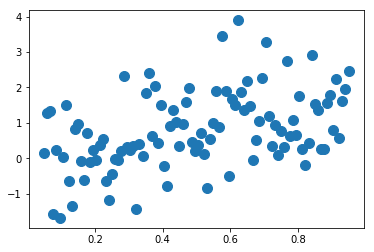

In [22]:
N_train=100 #number of points

sigma_train=1; #standard deviation

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw random noise
s = np.random.normal(scale=sigma_train,size=N_train)

#linear
y=2*x+s


plt.plot(x,y, "o",ms=10, label='Training')
plt.show()


In [23]:
print(x.reshape((len(x),1)))
print(np.shape(x))

[[0.05      ]
 [0.05909091]
 [0.06818182]
 [0.07727273]
 [0.08636364]
 [0.09545455]
 [0.10454545]
 [0.11363636]
 [0.12272727]
 [0.13181818]
 [0.14090909]
 [0.15      ]
 [0.15909091]
 [0.16818182]
 [0.17727273]
 [0.18636364]
 [0.19545455]
 [0.20454545]
 [0.21363636]
 [0.22272727]
 [0.23181818]
 [0.24090909]
 [0.25      ]
 [0.25909091]
 [0.26818182]
 [0.27727273]
 [0.28636364]
 [0.29545455]
 [0.30454545]
 [0.31363636]
 [0.32272727]
 [0.33181818]
 [0.34090909]
 [0.35      ]
 [0.35909091]
 [0.36818182]
 [0.37727273]
 [0.38636364]
 [0.39545455]
 [0.40454545]
 [0.41363636]
 [0.42272727]
 [0.43181818]
 [0.44090909]
 [0.45      ]
 [0.45909091]
 [0.46818182]
 [0.47727273]
 [0.48636364]
 [0.49545455]
 [0.50454545]
 [0.51363636]
 [0.52272727]
 [0.53181818]
 [0.54090909]
 [0.55      ]
 [0.55909091]
 [0.56818182]
 [0.57727273]
 [0.58636364]
 [0.59545455]
 [0.60454545]
 [0.61363636]
 [0.62272727]
 [0.63181818]
 [0.64090909]
 [0.65      ]
 [0.65909091]
 [0.66818182]
 [0.67727273]
 [0.68636364]
 [0.69

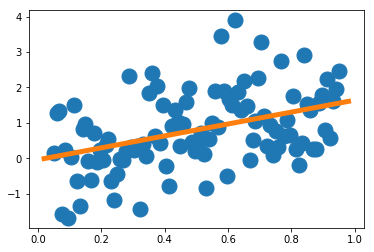

In [24]:
#Linear Regression
# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x.reshape((len(x),1)), y)
# The coefficients

xplot=np.linspace(0.02,0.98,100)

plt.plot(x,y, "o",ms=15, label='Training')
plt.plot(xplot, clf.predict(x.reshape((len(x),1))),label='Linear',linewidth=5)

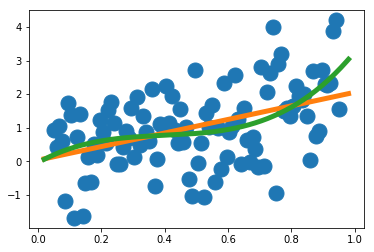

In [25]:
N_train=100

sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw random noise
s = np.random.normal(scale=sigma_train,size=N_train)

#linear
y=2*x+s


p1=plt.plot(x,y, "o",ms=15, label='Training')

#Linear Regression
# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x.reshape((len(x),1)), y)
# The coefficients

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot.reshape((len(xplot),1))),label='Linear',linewidth=5)

#Polynomial Regression


poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot.reshape((len(xplot),1)))
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3',linewidth=5)

In [12]:
poly3

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

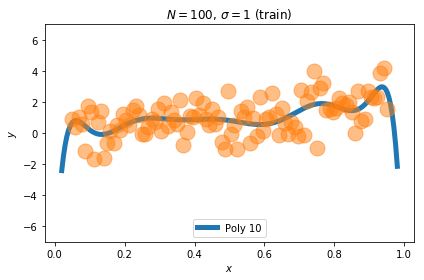

In [27]:


#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10',linewidth=5)

axes = plt.gca()
axes.set_ylim([-7,7])

handles, labels=axes.get_legend_handles_labels()
plt.legend(handles,labels, loc='lower center')
p1=plt.plot(x,y, "o",ms=15,alpha=0.5, label='Training')
plt.xlabel("$x$")
plt.ylabel("$y$")
Title="$N=$"+str(N_train)+", $\sigma=$"+str(sigma_train)
plt.title(Title+" (train)")
plt.tight_layout()
plt.show()


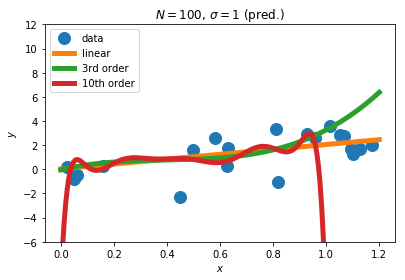

In [30]:
# Generate Test Data

#Number of test data
N_test=20

sigma_test=sigma_train

max_x=1.2
x_test=max_x*np.random.random(N_test)
# Draw random noise
s_test = np.random.normal(scale=sigma_train,size=N_test)

#Linear
y_test=2*x_test+s_test
#Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

#Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot.reshape((len(x_plot),1)))
X10 = poly10.fit_transform(x_plot.reshape((len(x_plot),1)))



p1=plt.plot(x_test,y_test.transpose(), 'o', ms=12, label='data',linewidth=5)
p2=plt.plot(x_plot,clf.predict(x_plot.reshape((len(x_plot),1))), label='linear',linewidth=5)
p3=plt.plot(x_plot,clf3.predict(X3), label='3rd order',linewidth=5)
p10=plt.plot(x_plot,clf10.predict(X10), label='10th order',linewidth=5)


plt.legend(loc=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))
plt.show()

